# Warmup 04/27

I implemented a linear neural network model to use on our weather data (available in the models.py file on github). Because we don't have our current weather data, I have tested that this model work on the Palmer penguins data to predict the body mass of the penguins. I have implemented the model in a class with a variety of helper functions, which should allow for easy training and testing of the model. 

In [1]:
import torch
import matplotlib.pyplot as plt

c:\Users\omara\.conda\envs\ml451\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%load_ext autoreload
%autoreload 2
from models import LM

In [19]:
import pandas as pd

train_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["Species"])

def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = df["Body Mass (g)"]
  df = df.drop(["Body Mass (g)"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(train)

test_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/test.csv"
test = pd.read_csv(test_url)

X_test, y_test = prepare_data(test)

In [20]:
X_train.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Species_Adelie Penguin (Pygoscelis adeliae),Species_Chinstrap penguin (Pygoscelis antarctica),Species_Gentoo penguin (Pygoscelis papua),Island_Biscoe,Island_Dream,Island_Torgersen,"Stage_Adult, 1 Egg Stage",Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,40.9,16.6,187.0,9.08458,-24.54903,0,1,0,0,1,0,1,0,1,1,0
1,49.0,19.5,210.0,9.53262,-24.66867,0,1,0,0,1,0,1,0,1,0,1
2,50.0,15.2,218.0,8.25540,-25.40075,0,0,1,1,0,0,1,0,1,0,1
3,45.8,14.6,210.0,7.79958,-25.62618,0,0,1,1,0,0,1,0,1,1,0
4,51.0,18.8,203.0,9.23196,-24.17282,0,1,0,0,1,0,1,0,1,0,1


In [48]:
y_train[:5]

tensor([3200., 3950., 5700., 4200., 4100.])

In [21]:
X_train = torch.from_numpy(X_train.to_numpy()).to(torch.float32)
X_test = torch.from_numpy(X_test.to_numpy()).to(torch.float32)
y_train = torch.from_numpy(y_train.to_numpy()).to(torch.float32)
y_test = torch.from_numpy(y_test.to_numpy()).to(torch.float32)

In [22]:
X_train.size()

torch.Size([256, 16])

In [44]:
model = LM()
model.train(X_train, y_train, X_test, y_test, epochs = 1000)

Epoch: 1 Loss: 17275352.0
Epoch: 2 Loss: 20740896.0
Epoch: 3 Loss: 17691436.0
Epoch: 4 Loss: 17498588.0
Epoch: 5 Loss: 19428848.0
Epoch: 6 Loss: 16930664.0
Epoch: 7 Loss: 17841464.0
Epoch: 8 Loss: 17649382.0
Epoch: 9 Loss: 15801609.0
Epoch: 10 Loss: 16707189.0
Epoch: 11 Loss: 16995000.0
Epoch: 12 Loss: 19290598.0
Epoch: 13 Loss: 16855120.0
Epoch: 14 Loss: 18008158.0
Epoch: 15 Loss: 20041978.0
Epoch: 16 Loss: 20887124.0
Epoch: 17 Loss: 19689254.0
Epoch: 18 Loss: 18244682.0
Epoch: 19 Loss: 19599002.0
Epoch: 20 Loss: 17587132.0
Epoch: 21 Loss: 18772722.0
Epoch: 22 Loss: 18336704.0
Epoch: 23 Loss: 15979001.0
Epoch: 24 Loss: 17086736.0
Epoch: 25 Loss: 15270572.0
Epoch: 26 Loss: 16498073.0
Epoch: 27 Loss: 17268988.0
Epoch: 28 Loss: 17746752.0
Epoch: 29 Loss: 16686664.0
Epoch: 30 Loss: 16923116.0
Epoch: 31 Loss: 17578498.0
Epoch: 32 Loss: 16436793.0
Epoch: 33 Loss: 15806888.0
Epoch: 34 Loss: 15362549.0
Epoch: 35 Loss: 12347272.0
Epoch: 36 Loss: 12958363.0
Epoch: 37 Loss: 12406304.0
Epoch: 38 

Text(0, 0.5, 'MSE Loss')

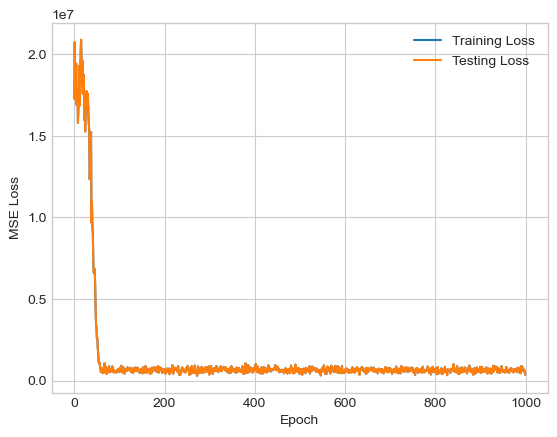

In [45]:
tr_loss, te_loss = model.loss()
plt.plot(tr_loss, label = 'Training Loss')
plt.plot(te_loss, label = 'Testing Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')

In [46]:
(model.predict(X_test) - y_test).mean()

tensor(-31.1434, grad_fn=<MeanBackward0>)

In [52]:
model.saveModel('uh.pt')

Saved model at uh.pt


In [55]:
## TODO: Fix enable model saving and loading
# newModel = LM().loadModel('uh.pt')